In [4]:
!pip install prophet

# IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prophet
# check prophet version
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.2


# DATA LOADING

In [8]:
df = pd.read_csv('Data/rice production across different countries from 1961 to 2021.csv')
df.head()

,Area,Year,Unit,Value,Flag,Flag Description
0,Afghanistan,1961,tonnes,319000.0,A,Official figure
1,Afghanistan,1962,tonnes,319000.0,A,Official figure
2,Afghanistan,1963,tonnes,319000.0,A,Official figure
3,Afghanistan,1964,tonnes,380000.0,A,Official figure
4,Afghanistan,1965,tonnes,380000.0,A,Official figure


# DATA RESAMPLING

In [ ]:
# new = pd.DataFrame()
new['ds'] = pd.to_datetime(df.Year.astype(str),format='%Y-%m', exact=True)
new['y'] = df['Value']
new

In [10]:
# Set year column as index
new.set_index('ds', inplace=True)

# Resample to annual frequency
#df = new.resample('A').mean()
new = new.resample('A').mean()

# DATA ANALYSIS

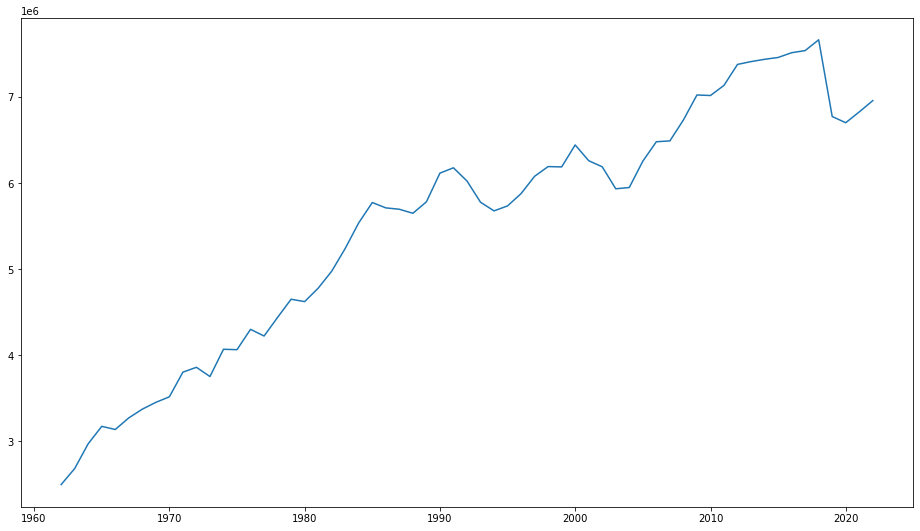

In [11]:
plt.figure(figsize=(16,9))
plt.plot(new.index,new.y)

<AxesSubplot:xlabel='ds'>

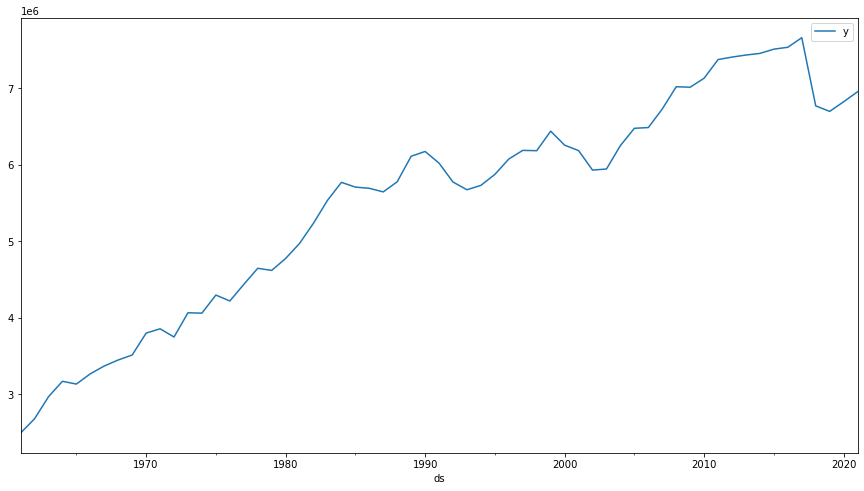

In [12]:
new.plot(figsize=(15,8))

In [13]:
new['ds']=new.index
new

,y,ds
ds,,
1961-12-31,2.494167e+06,1961-12-31
1962-12-31,2.680106e+06,1962-12-31
1963-12-31,2.968427e+06,1963-12-31
1964-12-31,3.170752e+06,1964-12-31
1965-12-31,3.134230e+06,1965-12-31
...,...,...
2017-12-31,7.663097e+06,2017-12-31
2018-12-31,6.771557e+06,2018-12-31
2019-12-31,6.699247e+06,2019-12-31


# MODEL BUILDING

In [14]:
# Python
model = prophet.Prophet(seasonality_mode='multiplicative')
model.fit(new)

14:42:13 - cmdstanpy - INFO - Chain [1] start processing
14:42:15 - cmdstanpy - INFO - Chain [1] done processing


# MODEL EVALUATION

In [15]:
future = model.make_future_dataframe(periods=1)
future.tail()

,ds
57,2018-12-31
58,2019-12-31
59,2020-12-31
60,2021-12-31
61,2022-01-01


In [17]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,2018-12-31,7.130799e+06,6.938839e+06,7.329619e+06
58,2019-12-31,7.101141e+06,6.902615e+06,7.294732e+06
59,2020-12-31,7.108113e+06,6.925447e+06,7.307105e+06
60,2021-12-31,7.088511e+06,6.908657e+06,7.279549e+06
61,2022-01-01,7.069841e+06,6.870827e+06,7.268640e+06


In [21]:
from sklearn.metrics import mean_absolute_error

# Generate predictions on test data
y_pred = forecast['yhat']

# Calculate root mean squared error
mae = mean_absolute_error(new['y'].values, y_pred[1:])
print('MAE:', mae)


MAE: 183251.0036309921


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(new['y'].values, y_pred[1:])
print(r2)

0.9759010632560402


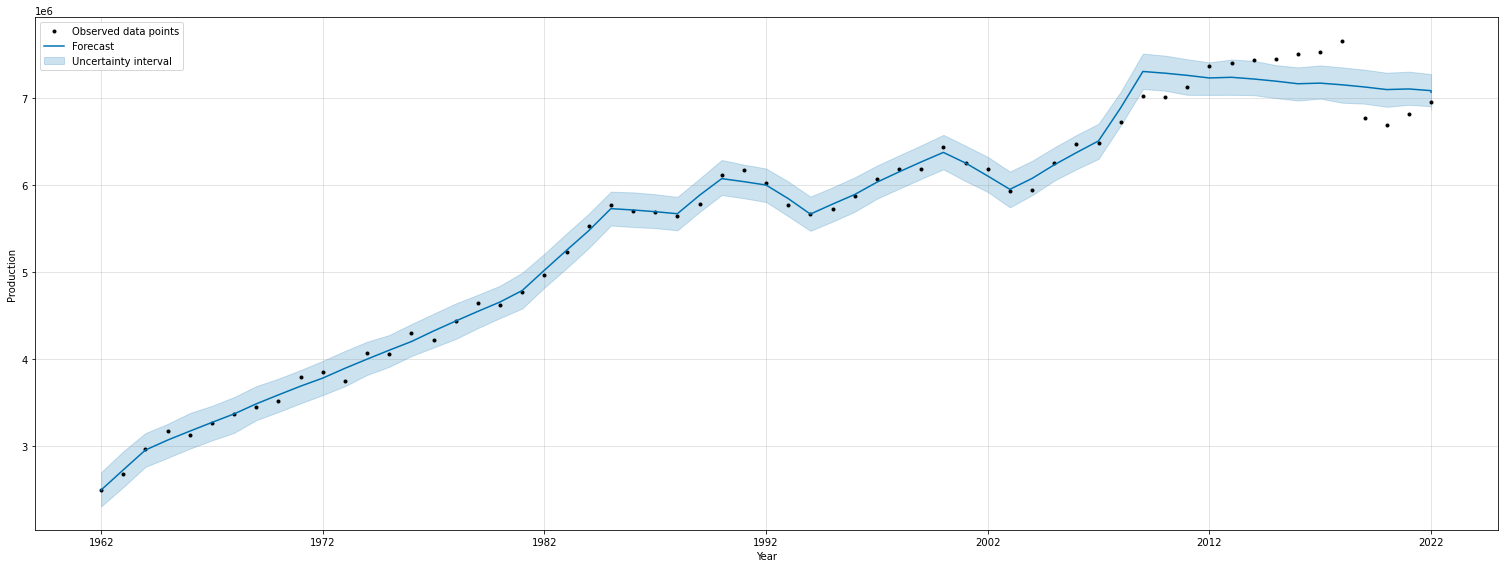

In [20]:
fig1 = model.plot(forecast,xlabel='Year',ylabel='Production',include_legend=True,figsize=(21,8))

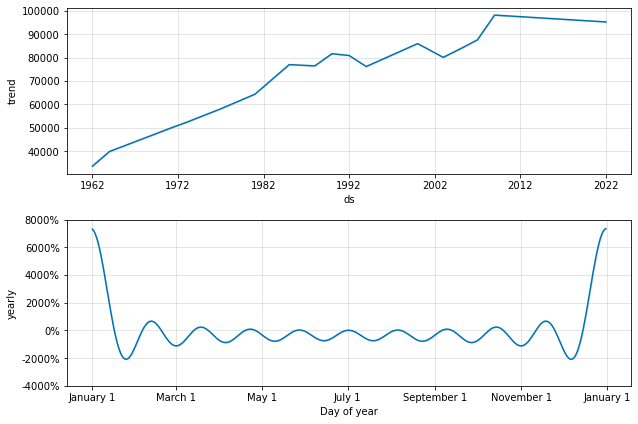

In [119]:
fig2 = model.plot_components(forecast)


#### Cross Validation

In [120]:
from prophet.diagnostics import cross_validation

In [115]:
cv = cross_validation(model,initial = '530 days',period='180 days',horizon = '365 days')
cv

  0%|          | 0/117 [00:00<?, ?it/s]

16:02:09 - cmdstanpy - INFO - Chain [1] start processing
16:02:09 - cmdstanpy - INFO - Chain [1] done processing
16:02:09 - cmdstanpy - INFO - Chain [1] start processing
16:02:19 - cmdstanpy - INFO - Chain [1] done processing
16:02:19 - cmdstanpy - INFO - Chain [1] start processing
16:02:28 - cmdstanpy - INFO - Chain [1] done processing
16:02:28 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:03:16 - cmdstanpy - INFO - Chain [1] done processing
16:03:16 - cmdstanpy - INFO - Chain [1] start processing
16:03:41 - cmdstanpy - INFO - Chain [1] done processing
16:03:41 - cmdstanpy - INFO - Chain [1] start processing
16:04:05 - cmdstanpy - INFO - Chain [1] done processing
16:04:05 - cmdstanpy - INFO - Chain [1] start processing
16:04:08 - cmdstanpy - INFO - Chain [1] done processing
16:04:08 - cmdstanpy - INFO - Chain [1] start processing
16:04:12 - cmdstanpy - INFO - Chain [1]

16:06:10 - cmdstanpy - INFO - Chain [1] done processing
16:06:10 - cmdstanpy - INFO - Chain [1] start processing
16:06:12 - cmdstanpy - INFO - Chain [1] done processing
16:06:12 - cmdstanpy - INFO - Chain [1] start processing
16:06:13 - cmdstanpy - INFO - Chain [1] done processing
16:06:14 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:17 - cmdstanpy - INFO - Chain [1] done processing
16:06:17 - cmdstanpy - INFO - Chain [1] start processing
16:06:18 - cmdstanpy - INFO - Chain [1] done processing
16:06:19 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:22 - cmdstanpy - INFO - Chain [1] done processing
16:06:22 - cmdstanpy - INFO - Chain [1] start processing
16:06:23 - cmdstanpy - INFO - Chain [1] done processing
16:06:24 - cmdstanpy - INFO - Chain [1] 

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1963-12-31,2.837191e+06,2.837191e+06,2.837191e+06,2.968427e+06,1963-11-01
1,1964-12-31,2.734409e+06,2.693494e+06,2.762626e+06,3.170752e+06,1964-04-29
2,1964-12-31,2.734409e+06,2.701016e+06,2.769322e+06,3.170752e+06,1964-10-26
3,1965-12-31,3.435785e+06,3.407513e+06,3.459255e+06,3.134230e+06,1965-04-24
4,1965-12-31,3.435785e+06,3.410201e+06,3.462174e+06,3.134230e+06,1965-10-21
...,...,...,...,...,...,...
112,2019-12-31,7.568568e+06,7.379116e+06,7.754923e+06,6.699247e+06,2019-01-11
113,2019-12-31,7.568568e+06,7.371511e+06,7.739737e+06,6.699247e+06,2019-07-10
114,2020-12-31,7.417671e+06,7.229374e+06,7.638322e+06,6.825269e+06,2020-01-06
115,2020-12-31,7.417671e+06,7.203234e+06,7.629114e+06,6.825269e+06,2020-07-04


#### Evaluation of Model

In [121]:
from prophet.diagnostics import performance_metrics
pm=performance_metrics(cv)
pm.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,54 days,1.300497e+11,360624.010625,314746.002990,0.053935,0.049546,0.053171,0.181818
1,59 days,1.272299e+11,356692.956939,310938.200310,0.052820,0.049546,0.052412,0.181818
2,60 days,1.121819e+11,334935.693628,284005.696929,0.049957,0.044210,0.049891,0.181818
3,64 days,1.098698e+11,331466.094254,279594.992367,0.048948,0.041638,0.049060,0.181818
4,66 days,1.224043e+11,349863.247335,298429.532612,0.058051,0.044210,0.059021,0.181818


#### Visualizing the performance Metrics

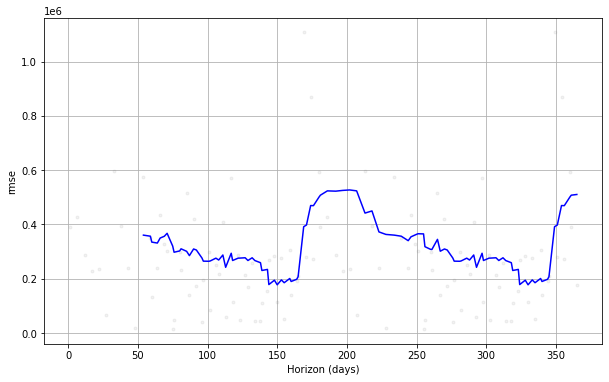

In [112]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv,metric='rmse')

# Saving Model

In [132]:
#import pickle
import pickle
pickle.dump(model,open('fbprophet.pkl','wb'))